In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [15]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data=data.loc[:,("Survived","Pclass","Sex","Age","SibSp","Parch","Fare")]

In [16]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


Now we are going to filter out all na columns or missing columns

In [17]:
data.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
dtype: int64

In [18]:
data.dropna(inplace=True)
data.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
Fare        714
dtype: int64

Encoding the categorical column sex 

In [21]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data.Sex=LE.fit_transform(data.Sex)
data.Sex

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 714, dtype: int64

Now we are going to split our dataset into train and test dataset

In [46]:
y= data.iloc[:,0]
x=data.iloc[:,1:]

#here this function is used to randomly split our data
from sklearn.model_selection import train_test_split as split

#Now we are going to keep our data into subdataset
#training=70% and testing=30%
x_train, x_test, y_train, y_test = split(x,y,test_size=.3)

y_train
#type(y_train)


443    1
236    0
645    1
105    0
579    1
      ..
628    0
716    1
119    0
68     1
594    0
Name: Survived, Length: 499, dtype: int64

Now we are going to build a decision tree for our prediction which is available from sklearn

In [51]:
from sklearn.tree import DecisionTreeClassifier
dectree= DecisionTreeClassifier()
#For training features=x_train and target=y_train
dectree.fit(x_train, y_train)  

#prediction would be made on x_test
pred = dectree.predict(x_test)  


Now we are going to compute accuracy, precison,confusion matrix  of model

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

from sklearn.metrics import recall_score
recall_score(y_test,pred)

from sklearn.metrics import precision_score
precision_score(y_test,pred)



0.6976744186046512

In [61]:
dectree = DecisionTreeClassifier(criterion='gini')
dectree.fit(x_train, y_train)
pred = dectree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dectree = DecisionTreeClassifier(criterion='entropy')
dectree.fit(x_train, y_train)
pred = dectree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.7302325581395349
Criterion=entropy 0.7488372093023256


Now we see with criterion as entropy the decision tree has better accuracy

Now we are going to visulaize the tree

StringIO(): creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
export_graphviz(): this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
graph_from_dot_data(): will use the DOT object to create the graph.
Image(): uses raw data to return an image (png, jpeg, gif).

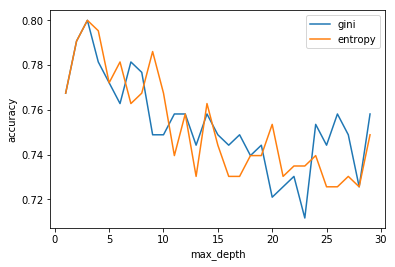

In [67]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dectree = DecisionTreeClassifier(criterion="gini", max_depth=i)
 dectree.fit(x_train, y_train)
 pred = dectree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dectree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
 dectree.fit(x_train, y_train)
 pred = dectree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({"acc_gini":pd.Series(acc_gini), 
 "acc_entropy":pd.Series(acc_entropy),
 "max_depth":pd.Series(max_depth)})
# visualizing changes in parameters
import matplotlib.pyplot as plt
plt.plot("max_depth","acc_gini", data=d, label="gini")
plt.plot("max_depth","acc_entropy", data=d, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

Now assume that i want to build a very simple tree with level less than 10
It would be much better to prune my tree back to level 7 or Level 8 but with criterion as entropy


In [75]:
#First with level 7
dectree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dectree.fit(x_train, y_train)
pred = dectree.predict(x_test)
print('Accuracy with level 7 and criterion as entropy = ',accuracy_score(y_test, pred))

#First with level 8
dectree = DecisionTreeClassifier(criterion="entropy", max_depth=8)
dectree.fit(x_train, y_train)
pred = dectree.predict(x_test)
print('Accuracy with level 8 and criterion as entropy = ',accuracy_score(y_test, pred))

Accuracy with level 7 and criterion as entropy =  0.772093023255814
Accuracy with level 8 and criterion as entropy =  0.7674418604651163


Now we see the best way to prune would be with level 7